In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
%matplotlib inline

# Thresolding and Segmentation

In [2]:
def main():
    
    subpath = "C:\\Users\\khush\\Documents\\OpenCV\\misc\\"
    #imgpath = subpath + "gray21.512.tiff"
    imgpath = subpath + "4.2.03.tiff"
    img = cv2.imread(imgpath)
    
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    th = 127
    max_val = 255
    
    ret , o1 = cv2.threshold(img , th , max_val , cv2.THRESH_BINARY)
    ret , o2 = cv2.threshold(img , th , max_val , cv2.THRESH_BINARY_INV)
    ret , o3 = cv2.threshold(img , th , max_val , cv2.THRESH_TOZERO)
    ret , o4 = cv2.threshold(img , th , max_val , cv2.THRESH_TOZERO_INV)
    ret , o5 = cv2.threshold(img , th , max_val , cv2.THRESH_TRUNC)
    
    imag = [img , o1 , o2 , o3 , o4 , o5]
    tit = ["Normal" , "Binary" , "Binary_inv" , "Tozero" , "Tozero_inv" , "Trunc"]
    
    plt.figure(figsize = (20,20))
    for i in range(5):
        plt.subplot(5,1,i+1)
        plt.imshow(imag[i])
        plt.title(tit[i])

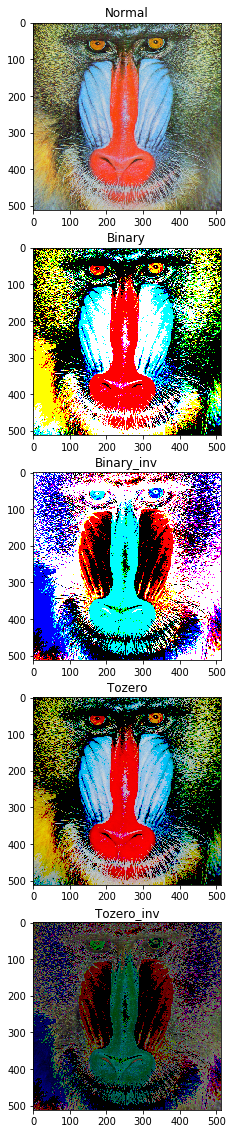

In [3]:
if __name__ == "__main__":
    main()

# Otsu's Binarization Thresolding

This method is very good for object detection

cv2.THRESH_OTSU

In [4]:
def main():
    
    subpath = "C:\\Users\\khush\\Documents\\OpenCV\\misc\\"
    imgpath = subpath + "7.1.08.tiff"
    img = cv2.imread(imgpath,0)
    
    th = 0
    max_val = 255
    
    ret , o1 = cv2.threshold(img , th , max_val , cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    ret , o2 = cv2.threshold(img , th , max_val , cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    ret , o3 = cv2.threshold(img , th , max_val , cv2.THRESH_TOZERO+cv2.THRESH_OTSU)
    ret , o4 = cv2.threshold(img , th , max_val , cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    ret , o5 = cv2.threshold(img , th , max_val , cv2.THRESH_TRUNC+cv2.THRESH_OTSU)
    
    imag = [img , o1 , o2 , o3 , o4 , o5]
    tit = ["Normal" , "Binary" , "Binary_inv" , "Tozero" , "Tozero_inv" , "Trunc"]
    
    plt.figure(figsize = (20,20))
    for i in range(5):
        plt.subplot(5,1,i+1)
        plt.imshow(imag[i],cmap = 'gray')
        plt.title(tit[i])

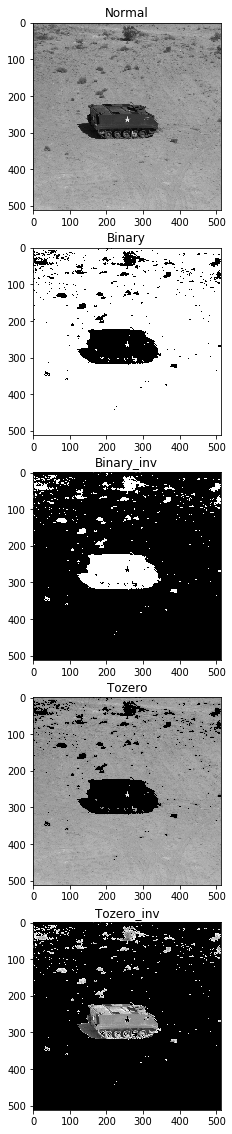

In [5]:
if __name__ == "__main__":
    main()

# Adaptive Thresholding

In [6]:
def main():
    subpath = "C:\\Users\\khush\\Documents\\OpenCV\\misc\\"
    imgpath = subpath + "7.1.08.tiff"
    img = cv2.imread(imgpath,0)
    
    block_size = 513
    constant = 2
    th1 = cv2.adaptiveThreshold(img , 255, cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY , block_size ,constant)
    th2 = cv2.adaptiveThreshold(img , 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY , block_size ,constant)
    
    
    output = [img , th1 , th2]
    titles = ['original' , 'mean adaptive' , 'gaussian adaptive']
    
    
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([]) 

    

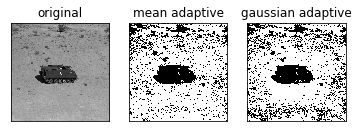

In [7]:
if __name__ == "__main__":
    main()
    

# Thresholding live web cam feed

In [12]:
def main():
    window = ["Orig" , "Bina" , "Bina_n" , "Zero" , "Zero_n" ,"Trun"]
    
    cap = cv2.VideoCapture(0)
    
    if cap.isOpened():
        ret , frame = cap.read()
        
    else:
        ret = False
        
    while True:
        ret , frame = cap.read()
        gray = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)
        
        th = 127
        max_val = 255
        
        ret , o1 = cv2.threshold(gray , th , max_val , cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        ret , o2 = cv2.threshold(gray , th , max_val , cv2.THRESH_BINARY_INV + + cv2.THRESH_OTSU)
        #ret , o3 = cv2.threshold(frame , th , max_val , cv2.THRESH_TOZERO)
        #ret , o4 = cv2.threshold(frame , th , max_val , cv2.THRESH_TOZERO_INV)
        #ret , o5 = cv2.threshold(frame , th , max_val , cv2.THRESH_TRUNC)
        
        cv2.imshow(window[0] , frame)
        cv2.imshow(window[1] , o1)
        cv2.imshow(window[2] , o2)
        #cv2.imshow(window[3] , o3)
        #cv2.imshow(window[4] , o4)
        #cv2.imshow(window[5] , o5)
        
        if cv2.waitKey(1) == 27:
            break
            
    cv2.destroyAllWindows()
    cap.release()
        
        

In [13]:
if __name__ == "__main__":
    main()